# Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

## Defining Problem Statement and Analysing basic metrics

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('aerofit.csv')
df2 =pd.read_csv('aerofit.csv')

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.shape

(180, 9)

In [8]:
df.sample(20)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
27,KP281,25,Female,14,Partnered,3,3,48891,75
16,KP281,23,Female,14,Single,2,3,34110,103
126,KP481,34,Male,16,Partnered,3,4,59124,85
155,KP781,25,Male,18,Partnered,6,5,75946,240
44,KP281,28,Female,14,Partnered,2,3,46617,56
169,KP781,30,Male,18,Partnered,5,5,99601,150
120,KP481,33,Male,13,Partnered,4,4,53439,170
93,KP481,23,Male,16,Partnered,3,3,45480,64
176,KP781,42,Male,18,Single,5,4,89641,200
79,KP281,50,Female,16,Partnered,3,3,64809,66


**Observation:** there are 180 rows 9 columns and it does not seem like there are any nested data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

**Observation:** There are 9 columns and and we can see that there are no null values in any of the columns

In [11]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Observation:** All the relevant count , mean, std, min, 3 quartiles and max for each of the numeric fields. Usage can be treated as a categorical data between 1 and 7. Fitness is a categorical data between 1 to 5. Age, education, Income and miles are more continuous in nature.

In [12]:
df.describe(include=object)

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


**Observation:** As can be seen above KP281 is the most popular model . more than 2/3rd (104) of the customers are Male . Most of the customer are Partnered. SO at first glance it seems like Male partnered customer is the most likely to buy a KP281, but that is not the full story.

# Detect Outliers 

In [13]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

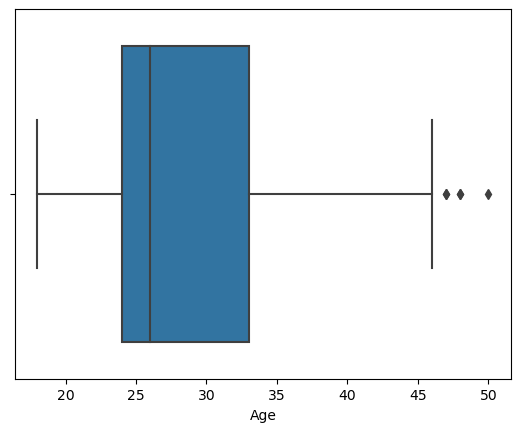

In [14]:
sns.boxplot(df['Age'])

**Observation:** As can be seen values roughly above 46 are outliers

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education'>

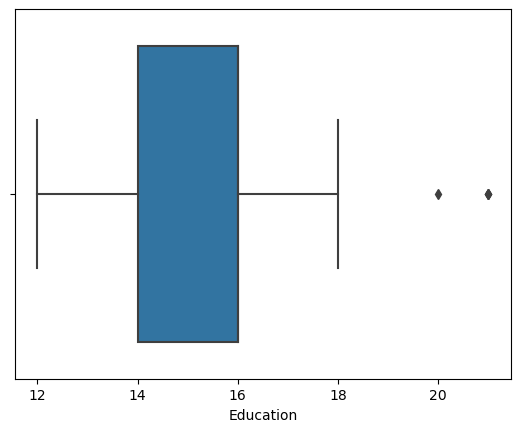

In [16]:
sns.boxplot(df['Education'])

**Observation:** Education roughly above 20 years can be considered as outliers

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Usage'>

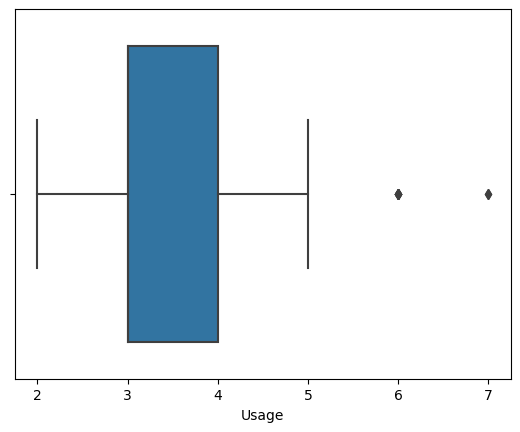

In [17]:
sns.boxplot(df['Usage'])

**Observation:** Usage above 5 can be considered an outlier

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fitness'>

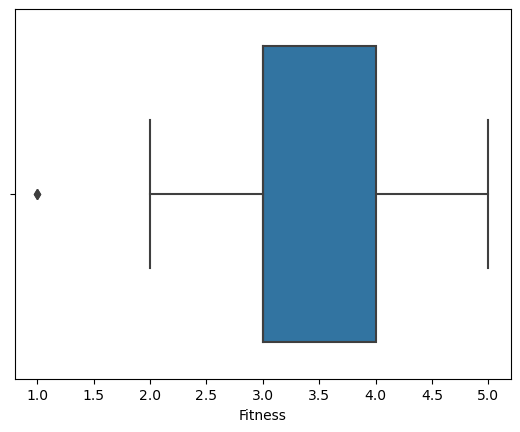

In [18]:
sns.boxplot(df['Fitness'])

**Observation:** Fitness lower than 2 can be considered as outlier

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Income'>

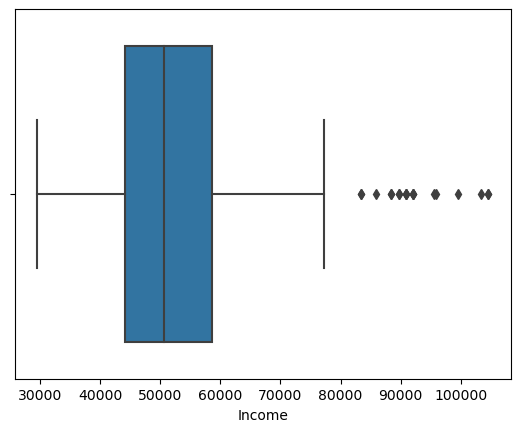

In [19]:
sns.boxplot(df['Income'])

**Observation:** Income more than 80000 can be considered as outlier

D:\anaconda_home\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Miles'>

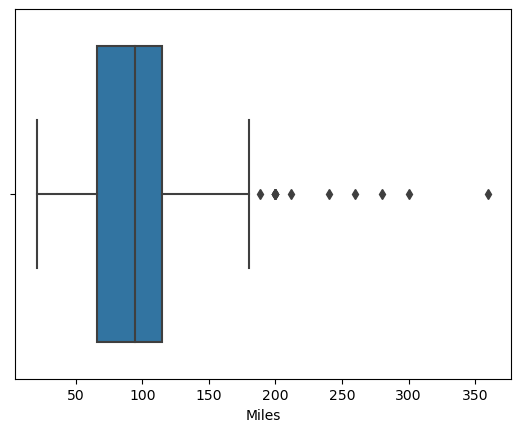

In [20]:
sns.boxplot(df['Miles'])

**Observation:** Expected miles roughly more than 180 can be considered as outlier

# Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

## Visual Analysis - Univariate & Bivariate

In [3]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


<AxesSubplot:xlabel='Product', ylabel='count'>

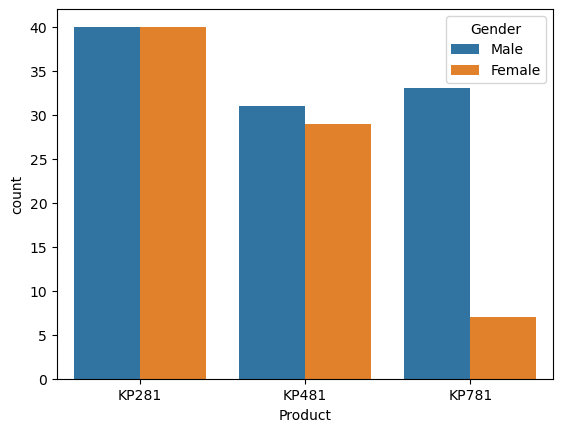

In [76]:
sns.countplot(x ='Product',hue='Gender', data = df)

**Observation:** KP281 and KP481 are almost equaly popular among Male and Female whereas KP781 is significantly more popular among Male customers

<AxesSubplot:xlabel='Product', ylabel='count'>

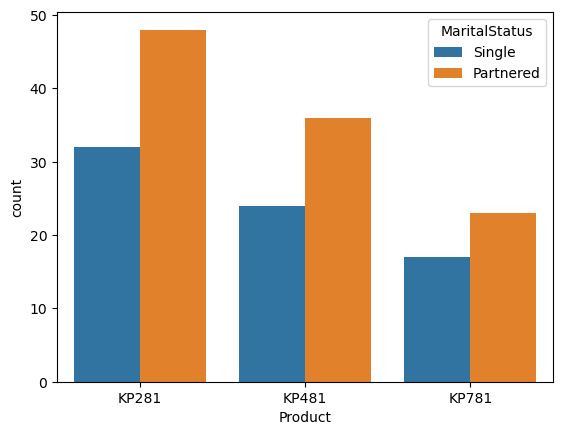

In [6]:
sns.countplot(x ='Product',hue='MaritalStatus', data = df)

**Observation:** Partnered people are more likely to buy treadmills across all 3 products. But the difference between single and partnered people keeps decreasing from KP281 to KP481 to KP781 

<AxesSubplot:xlabel='Product', ylabel='count'>

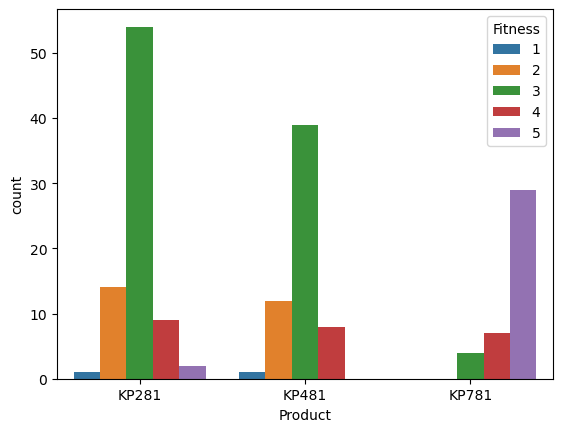

In [7]:
sns.countplot(x ='Product',hue='Fitness', data = df)

**Observation:** People who rate themselves as 2 and 3 are more likely to buy KP281 and KP481 where as people who rate themselves as 4 and 5 are more likely to buy KP781 

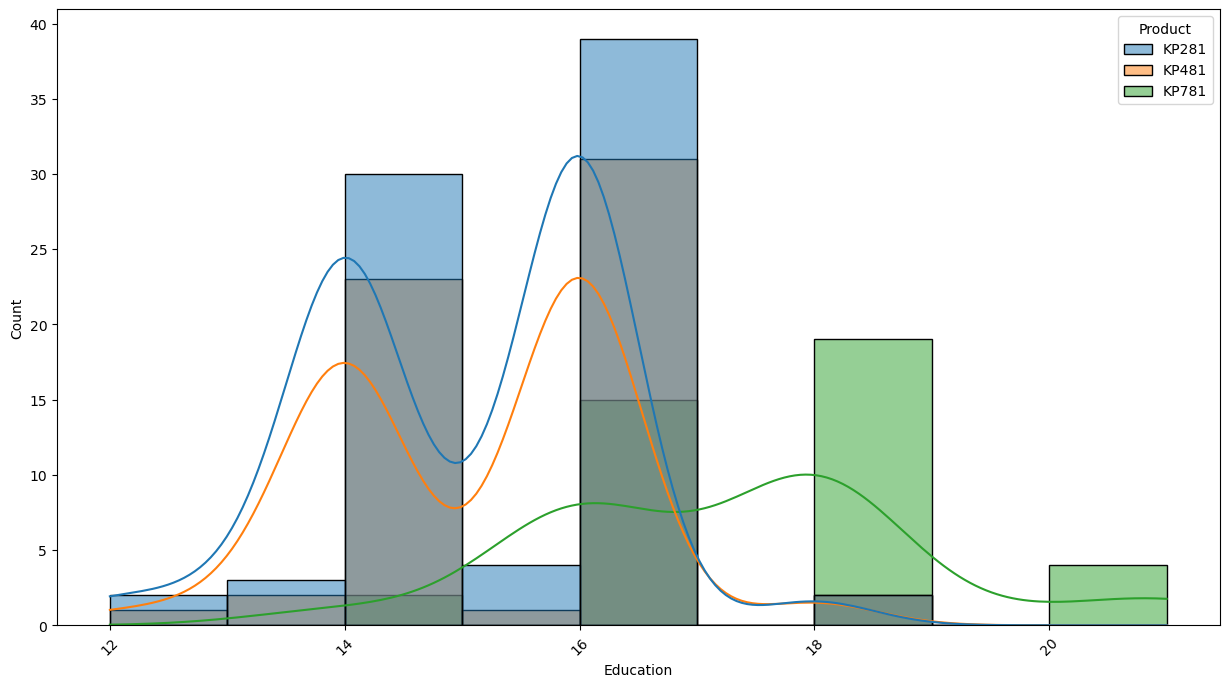

In [78]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(hue ='Product',x="Education", bins=9, data = df, kde=True)
plt.show()

**Observation:** People with 14 , 16 or 18 years of education are more likely to buy a treadmill. all three products are popular among people with education 16 or less. whereas people with education level 18 and above almost exclusively buy KP781

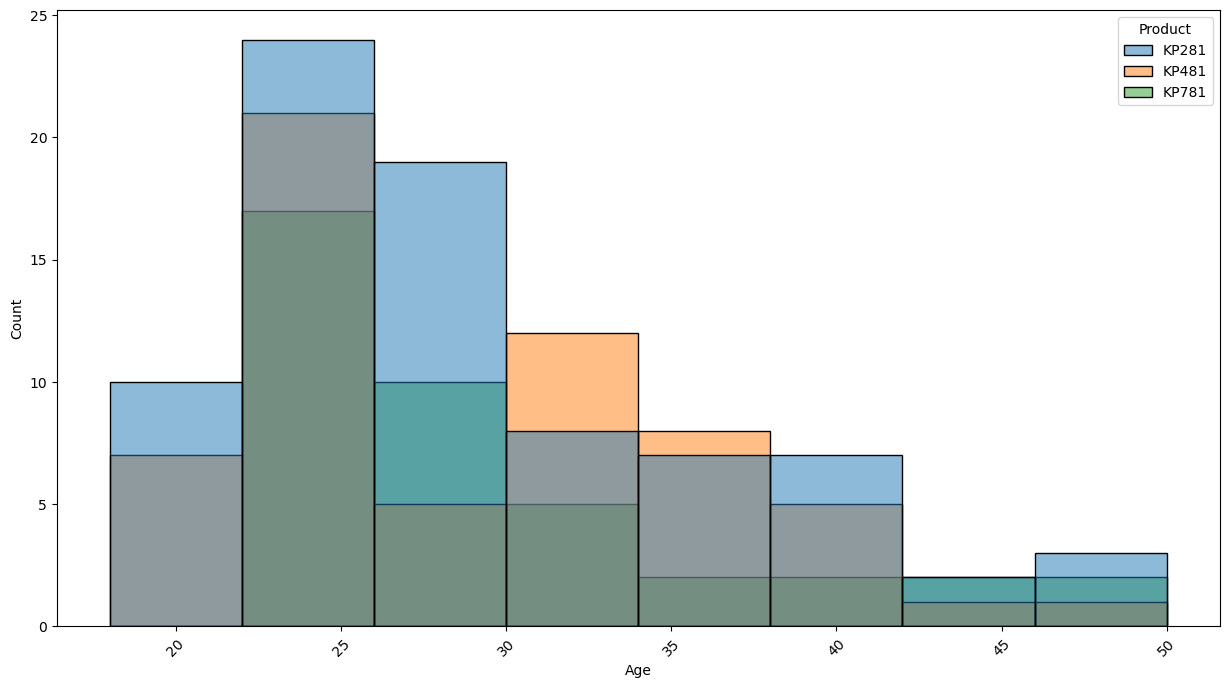

In [79]:

plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(hue ='Product',x="Age", bins=8, data = df)
plt.show()

**Observation:** Treadmills are mostly popular in the 22 to 34 years of Age range. the likelihood of buying a treadmill decreases with increase in age. KP781 is particularly popular in the 22 to 26 years of age range

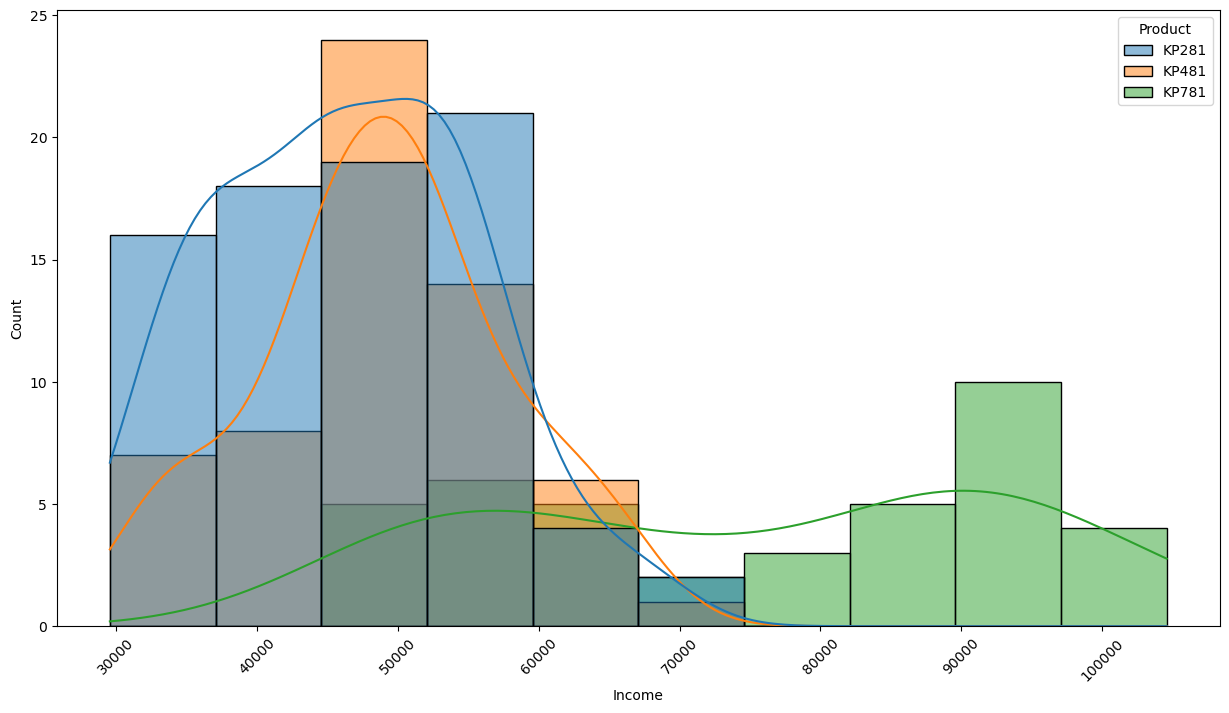

In [23]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.histplot(hue ='Product',x="Income", bins=10, data = df, kde=True)
plt.show()

**Observation:** People with income above 75000 almost exclusively buy KP781. People with income from 30000 to 59000 generally prefer KP281 and KP481. Popularity of treadmill is lowest in the 66000 to 74000 income range

# Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table

## Non-Graphical Analysis: Value counts and unique attributes

In [27]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [28]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Observation:** the entry-level KP281 is the most popular product.

In [29]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Observation:** Male buy more treadmill

In [30]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observation:** Partnered people are more likely to buy treadmill

In [31]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

**Observation:** People rating themselves at fitness 3 is almost 3 time likely to buy a treadmill than the second most common rating of 5

# Check correlation among different factors using heat maps or pair plots

<AxesSubplot:>

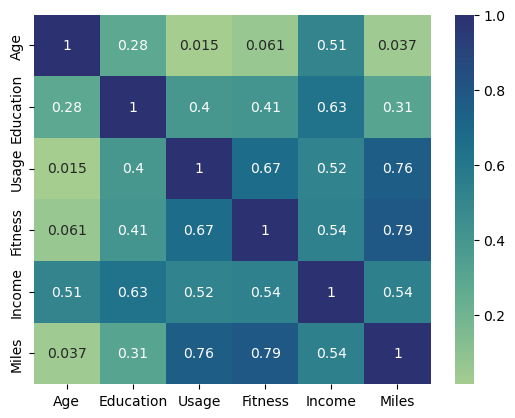

In [41]:
sns.heatmap(df.corr(),annot=True, cmap="crest")

**Observation:** features that seem like most correlated are:

> 1. Age seems to have the least coorelation with other fields
> 2. Education correlated to Income
> 3. Income and Fitness are very highly correlated to most of the other fields. which means they are key determining factors while making a purchase decision

<AxesSubplot:xlabel='Income', ylabel='Product'>

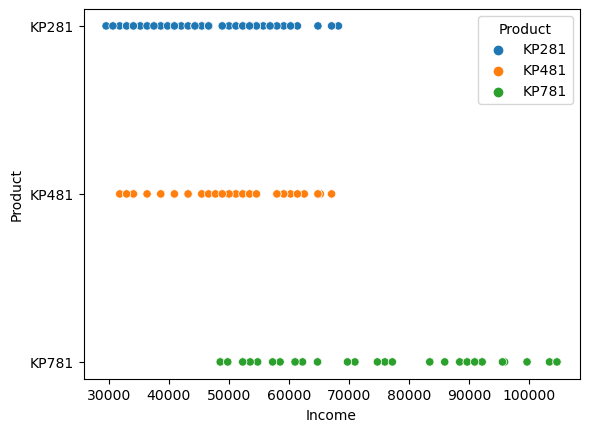

In [70]:
sns.scatterplot(x='Income',y='Product', hue="Product",data=df)

**Observation:** People with income above 75000 almost exclusively buy KP781. People with income from 30000 to 59000 generally prefer KP281 and KP481. Popularity of treadmill is lowest in the 66000 to 74000 income range

<AxesSubplot:xlabel='Age', ylabel='Product'>

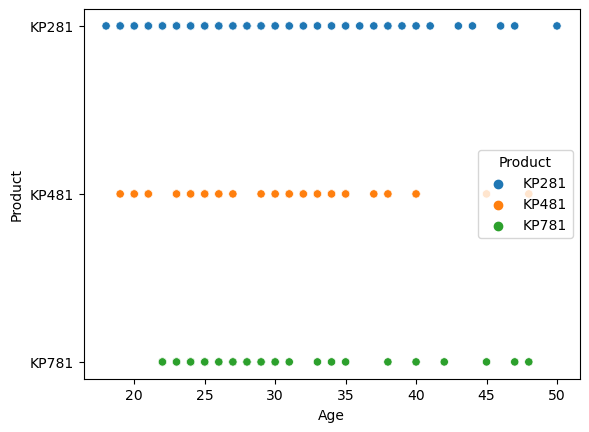

In [71]:
sns.scatterplot(x='Age',y='Product', hue="Product",data=df)

**Observation:** Treadmills are mostly popular in the 22 to 34 years of Age range. the likelihood of buying a treadmill decreases with increase in age.

<AxesSubplot:xlabel='Education', ylabel='Product'>

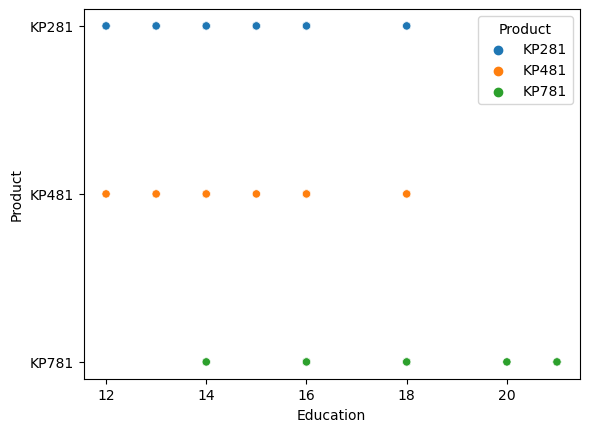

In [72]:
sns.scatterplot(x='Education',y='Product', hue="Product",data=df)

**Observation:** people with education level 18 and above almost exclusively buy KP781. people with education level lower than 14 prefer either KP281 or KP481

<AxesSubplot:xlabel='Fitness', ylabel='Product'>

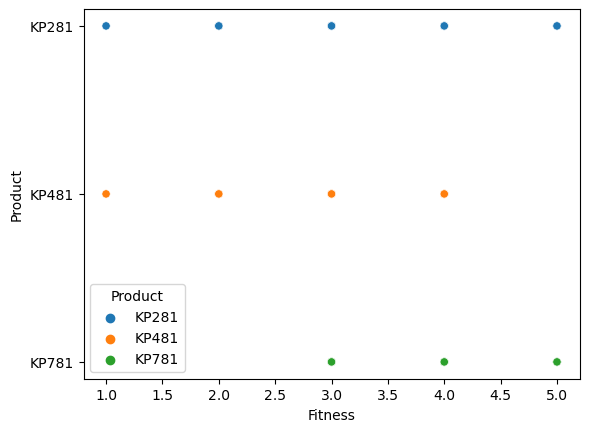

In [73]:
sns.scatterplot(x='Fitness',y='Product', hue="Product",data=df)

**Observation:** People who rate themselves as lower than 3 are more likely to buy KP281 and KP481 where as people who rate themselves as 4 and 5 are more likely to buy KP781

<AxesSubplot:xlabel='Miles', ylabel='Product'>

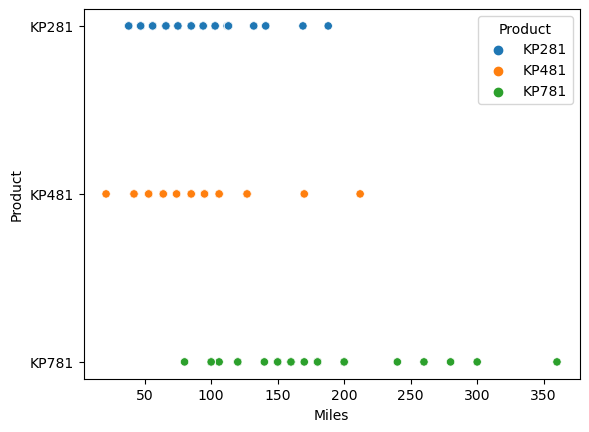

In [74]:
sns.scatterplot(x='Miles',y='Product', hue="Product",data=df)

**Observation:** People who intend to run more than 240 Mile almost exclusively buy KP781. Whereas People who want to run less than 100 miles tend to prefer either of KP281 or KP481

<Figure size 800x800 with 0 Axes>

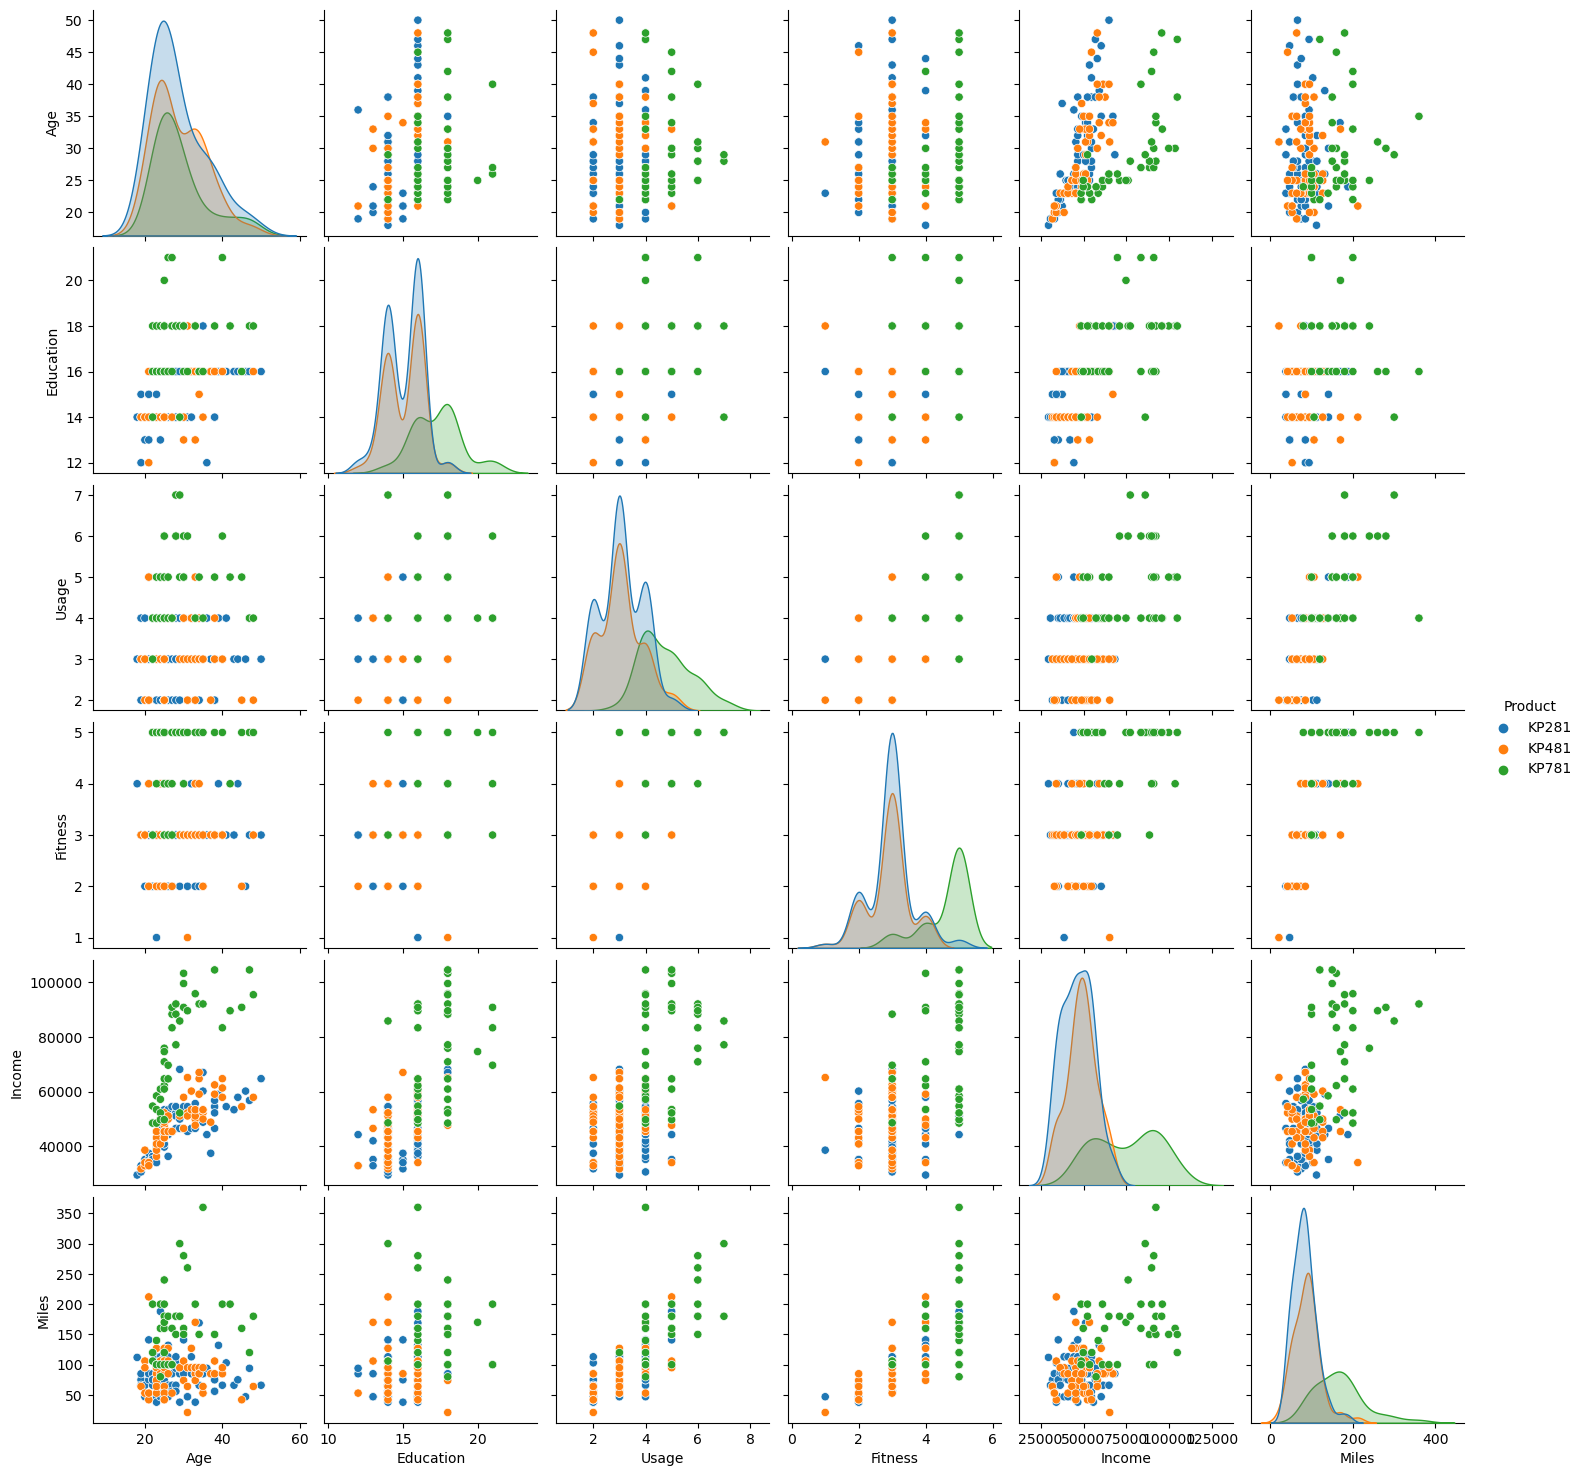

In [42]:
plt.figure(figsize=(8,8))
sns.pairplot(data=df,hue="Product")

**Observation:** 

# Probability- marginal, conditional probability.

## analyse data using pandas.crosstab to identify the relation between the different parameters

In [44]:
pd.crosstab(df['Product'], [df['Gender'], df['MaritalStatus']])

Gender           Female             Male       
MaritalStatus Partnered Single Partnered Single
Product                                        
KP281                27     13        21     19
KP481                15     14        21     10
KP781                 4      3        19     14

**Observation:** KP781 is more popular among Male. partnered people are more likely to buy treadmills. partnered female has a higher preference for KP281.

In [45]:
pd.crosstab(df['Product'], [df['Gender'], df['Education']])

Gender    Female                  Male                        
Education     13  14 15  16 18 21   12 13  14 15  16  18 20 21
Product                                                       
KP281          0  18  2  19  1  0    2  3  12  2  20   1  0  0
KP481          1  12  0  14  2  0    1  1  11  1  17   0  0  0
KP781          0   0  0   2  4  1    0  0   2  0  13  15  1  2

**Observation:** KP281 and KP481 is mostly popular among male and female Education of 14 and 16. KP 781 is mostly popular among Male in the education of 16 and 18. Male 16 year Education in general has the highest chance of buying a treadmill across all 3 products.

In [46]:
pd.crosstab(df['Product'], [df['Gender'], df['Fitness']])

Gender  Female               Male              
Fitness      1   2   3  4  5    1  2   3  4   5
Product                                        
KP281        0  10  26  3  1    1  4  28  6   1
KP481        1   6  18  4  0    0  6  21  4   0
KP781        0   0   1  1  5    0  0   3  6  24

**Observation:** Male and female with a fitness score of 3 is more likely to buy KP281 or KP481/ Where as male of female with fitness rating 5 is more likely to buy KP781

In [80]:
pd.crosstab(df['Product'], [df['Gender'], df['Usage']])

Gender  Female              Male                 
Usage        2   3  4  5  6    2   3   4  5  6  7
Product                                          
KP281       13  19  7  1  0    6  18  15  1  0  0
KP481        7  14  5  3  0    7  17   7  0  0  0
KP781        0   0  2  3  2    0   1  16  9  5  2

**Observation:** Female with usage 2 and 3 is more likely to buy KP281 and KP 481. Male with usage 3 tend to buy KP281 or KP481 . Where as KP781 is preferred by Male with usage 4 or 5

In [49]:
pd.crosstab(df['Product'], [df['Gender'], df['MaritalStatus'],df['Fitness'],df['Education']]).T

Product                                 KP281  KP481  KP781
Gender MaritalStatus Fitness Education                     
Female Partnered     2       14             4      1      0
                             15             1      0      0
                             16             2      1      0
                     3       14             9      4      0
                             15             1      0      0
                             16             8      8      0
                     4       14             1      1      0
                     5       16             1      0      1
                             18             0      0      3
       Single        1       18             0      1      0
                     2       14             1      3      0
                             16             2      1      0
                     3       13             0      1      0
                             14             2      2      0
                             16             5      3      0
                             18             1      0      0
                             21             0      0      1
                     4       14             1      1      0
                             16             1      1      0
                             18             0      1      1
                     5       16             0      0      1
Male   Partnered     1       16             1      0      0
                     2       12             0      1      0
                             13             2      0      0
                             14             1      0      0
                             16             1      4      0
                     3       14             2      3      0
                             16            10     10      0
                             18             1      0      1
                     4       13             0      1      0
                             14             1      1      0
                             16             2      1      2
                             18             0      0      2
                             21             0      0      1
                     5       14             0      0      1
                             16             0      0      4
                             18             0      0      7
                             20             0      0      1
       Single        2       14             0      1      0
                     3       12             2      0      0
                             13             1      0      0
                             14             7      5      1
                             15             1      1      0
                             16             4      2      0
                             18             0      0      1
                     4       14             1      1      0
                             15             1      0      0
                             16             1      0      0
                             18             0      0      1
                     5       16             1      0      7
                             18             0      0      3
                             21             0      0      1

**Observation:** Male , partnered , 3 fitness score, and 16 year education AND  Female , partnered , 3 fitness score, and 16 year education are more likely to buy a KP281 or KP481 treadmill. where as Male,  Partnered with fitness rating 4 or 5 is more likely to buy KP781.

## With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?

In [43]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


### Marginal probability

In [51]:
df.groupby('Gender').size().div(len(df))

Gender
Female    0.422222
Male      0.577778
dtype: float64

In [60]:
bins = [18, 20, 25, 30, 35, 40, 46] #removed outlier 50
groups = df.groupby(['Product', pd.cut(df['Age'], bins)])
groups.size().unstack()


Age,"(18, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 46]"
Product,,,,,,
KP281,5,28,21,11,8,4
KP481,4,24,7,17,6,1
KP781,0,17,13,4,2,2


In [59]:
groups.size().unstack().div(len(df))

Age,"(18, 20]","(20, 25]","(25, 30]","(30, 35]","(35, 40]","(40, 46]"
Product,,,,,,
KP281,0.027778,0.155556,0.116667,0.061111,0.044444,0.022222
KP481,0.022222,0.133333,0.038889,0.094444,0.033333,0.005556
KP781,0.000000,0.094444,0.072222,0.022222,0.011111,0.011111


**Observation:** Male have a higher probability to buy a treadmill. KP281 and KP781 is most popular in the age group of 20 to 30. Where as KP481 is popular in the age group 20 to 25 and 30 to 35.

In [57]:
df.groupby('MaritalStatus').size().div(len(df))

MaritalStatus
Partnered    0.594444
Single       0.405556
dtype: float64

**Observation:** Partnered people has almost 60 % chance to buy a treadmill.

In [63]:
bins2 =[30000, 40000,50000,60000,70000, 80000]
groups2 = df.groupby(['Product', pd.cut(df['Income'], bins2)])
groups2.size().unstack()

Income,"(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 70000]","(70000, 80000]"
Product,,,,,
KP281,22,25,26,6,0
KP481,9,21,23,7,0
KP781,0,5,6,6,4


In [64]:
groups2.size().unstack().div(len(df))

Income,"(30000, 40000]","(40000, 50000]","(50000, 60000]","(60000, 70000]","(70000, 80000]"
Product,,,,,
KP281,0.122222,0.138889,0.144444,0.033333,0.000000
KP481,0.050000,0.116667,0.127778,0.038889,0.000000
KP781,0.000000,0.027778,0.033333,0.033333,0.022222


**Observation:** people with income between 30k and 60k tend to buy KP281 or KP481. Where as people with income more than 70k almost exclusively buy KP781

### Conditional Probability:

In [66]:
pd.crosstab(df['Product'], df['Gender'], margins=True, normalize="columns")

Gender,Female,Male,All
Product,,,
KP281,0.526316,0.384615,0.444444
KP481,0.381579,0.298077,0.333333
KP781,0.092105,0.317308,0.222222


**Observation:**

In [67]:
pd.crosstab(df['Product'], df['MaritalStatus'], margins=True, normalize="columns")

MaritalStatus,Partnered,Single,All
Product,,,
KP281,0.448598,0.438356,0.444444
KP481,0.336449,0.328767,0.333333
KP781,0.214953,0.232877,0.222222


**Observation:**

In [68]:
pd.crosstab(df['Product'], df['Fitness'], margins=True, normalize="columns")

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,0.5,0.538462,0.556701,0.375000,0.064516,0.444444
KP481,0.5,0.461538,0.402062,0.333333,0.000000,0.333333
KP781,0.0,0.000000,0.041237,0.291667,0.935484,0.222222


**Observation:** people with fitness rating 1 or 2 never buys KP781 . whereas people with fitness rating 5 never buys KP481

# Customer Profiling - Categorization of users.

## KP281

**Customer Profile:** 
> 1. Age : 20 to 30
> 2. Gender : Female / Male
> 3. Education : 14 to 16
> 4. Marital Status : Partnered
> 5. Usage : 2 to 3
> 6. Fitness : 2/3
> 7. Income : 30000 to 59000
> 8. Miles : less than 150

## KP481

**Customer Profile:** 
> 1. Age : 20 to 25 or 30 to 35
> 2. Gender : Male / female
> 3. Education : 14 to 16
> 4. Marital Status: Partnered
> 5. Usage : 2 to 3
> 6. Fitness : 2/3
> 7. Income : 30000 to 59000
> 8. Miles: less than 150

## KP781

**Customer Profile:** 
> 1. Age : 22 to 26
> 2. Gender : Male
> 3. Education : greater than 16
> 4. Marital Status : Partnered
> 5. Usage: 4 to 5
> 6. Fitness : 4/5
> 7. Income : greater than 75000
> 8. Miles: greater than 200

#  Some recommendations and actionable insights, based on the inferences

## Business Insights based on Non-Graphical and Visual Analysis

***All the insights and observations are mentioned next to each cell after both graphical and non-graphical analysis is done. Marked as "Observation"***

## Recommendations 

> 1. KP281 and KP481 has overlapping customer profile. SO they can be either clubbed into a single product or changes shoul be made to make them more different to appeal to different demographic
> 2. Single people are less likely to buy treadmills over all. so more effort needs to go in to attract more single customers.
> 3. People with education lower than 14 does not buy treadmills . So the efforts needs to be made to make the product more accessible to this demographic.
> 4. Lower priced entry level model needed for income group less than 30k